In [1]:
import os
import time
import numpy as np
import pandas as pd

In [2]:
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

### Q1: Create Pandas DataFrame (2 points)

In [3]:
# Set random seed for reproducibility
np.random.seed(1)

In [4]:
# Create DataFrame with random values in range [0, 100)
# Shape: 20,000 rows × 200 columns
df = pd.DataFrame(np.random.uniform(low=0, high=100, size=(20000, 200)))

In [5]:
# Verify the shape and display basic info
print(f"DataFrame shape: {df.shape}")
print(f"Data type: {df.dtypes.unique()}")

DataFrame shape: (20000, 200)
Data type: [dtype('float64')]


In [6]:
print(f"\nFirst few rows and columns:")
print(df.head())


First few rows and columns:
         0          1          2          3          4    ...        195  \
0  41.702200  72.032449   0.011437  30.233257  14.675589  ...  93.197207   
1  95.017612  55.665319  91.560635  64.156621  39.000771  ...  84.384043   
2  95.943432  80.396089   3.232307  70.938725  46.500148  ...  19.894792   
3  67.456402  79.977654   8.052953  23.170231  20.762566  ...  80.827801   
4  88.838643  18.438444  58.534846  89.820505  44.611722  ...  97.440347   

         196        197        198        199  
0   1.395157  23.436209  61.677836  94.901632  
1  38.101612  74.985831  51.114148  54.095180  
2  14.251834  37.708260   2.662788  11.092037  
3  29.528879  54.412138  48.792149  85.535641  
4  31.170292  66.879661  32.596721  77.447727  

[5 rows x 200 columns]


In [7]:
df.describe()

,0,1,2,3,4,...,195,196,197,198,199
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,49.733139,49.969568,49.900073,49.763373,49.923128,...,50.152815,49.960517,49.494542,50.121772,50.294948
std,28.919181,28.731997,28.685113,28.950549,28.887751,...,29.103752,28.929825,28.915056,28.842943,28.736228
min,0.001894,0.013255,0.010645,0.002625,0.000434,...,0.005064,0.015429,0.006908,0.001499,0.000592
25%,24.622514,25.262072,25.189998,24.531855,24.741670,...,24.702085,24.926897,24.349206,24.994347,25.677021
50%,49.463178,49.756465,49.931907,49.839105,49.863330,...,50.406767,49.846507,49.264465,49.973726,50.582351
75%,74.999424,74.774822,74.505115,74.728899,74.962808,...,75.591448,74.955125,74.617984,75.159447,74.867836
max,99.987054,99.999267,99.990001,99.999319,99.995634,...,99.985607,99.999379,99.992899,99.995881,99.995789


In [8]:
# Check if any value in the entire DataFrame equals 100
has_100 = (df == 100).any().any()
print(f"Does DataFrame contain any value equal to 100? {has_100}")

count_100 = (df == 100).sum().sum()
print(f"Number of values equal to 100: {count_100}")

Does DataFrame contain any value equal to 100? False
Number of values equal to 100: 0


### Q2: Normalize Columns with Timing (4 points)

In [9]:
# Start timer
start_time = time.time()
 
# Normalize each column (subtract mean, divide by std)
df_normalized = (df - df.mean()) / df.std()
 
# End timer
end_time = time.time()
 
# Print time taken
print(f"Time taken for normalization: {end_time - start_time:.4f} seconds")
 
# Display summary to confirm normalization
print("\nMean (first 5 cols):\n", df_normalized.mean().head())
print("\nStd (first 5 cols):\n", df_normalized.std().head())

Time taken for normalization: 0.1176 seconds

Mean (first 5 cols):
 0    4.197465e-15
1    3.212178e-15
2   -4.815801e-15
3    6.710266e-15
4   -2.590061e-15
dtype: float64

Std (first 5 cols):
 0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
dtype: float64


In [10]:
def normalize_columns_pandas(df):
    """
    Normalize all columns using z-score normalization.
    Formula: (x - mean) / std
    """
    return (df - df.mean()) / df.std()

# Time the normalization
start_time = time.time()
df_normalized = normalize_columns_pandas(df)
end_time = time.time()

normalization_time = end_time - start_time
print(f"Normalization completed in: {normalization_time:.4f} seconds")

Normalization completed in: 0.0733 seconds


In [11]:
# Verify normalization (mean should be ~0, std should be ~1)
print(f"\nVerification of normalization:")
print(f"Mean of first 5 columns (should be ~0):")
print(df_normalized.iloc[:, :5].mean())
print(f"\nStandard deviation of first 5 columns (should be ~1):")
print(df_normalized.iloc[:, :5].std())


Verification of normalization:
Mean of first 5 columns (should be ~0):
0    4.197465e-15
1    3.212178e-15
2   -4.815801e-15
3    6.710266e-15
4   -2.590061e-15
dtype: float64

Standard deviation of first 5 columns (should be ~1):
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
dtype: float64


In [12]:
def rowwise_correlation(df):
    """
    Computes the correlation between each row and its succeeding row.
    Also prints time taken for computation.
    Parameters:
        df (pd.DataFrame): Input DataFrame
    Returns:
        correlations (np.ndarray): Array of correlation values
        elapsed_time (float): Time taken in seconds
    """
    import time
    start_time = time.time()
 
    # Compute correlation for each consecutive row pair
    correlations = [
        np.corrcoef(df.iloc[i], df.iloc[i + 1])[0, 1] 
        for i in range(len(df) - 1)
    ]
    elapsed_time = time.time() - start_time
    print(f"Time taken for row-wise correlation: {elapsed_time:.4f} seconds")
    return np.array(correlations), elapsed_time
 
row_corrs, corr_time = rowwise_correlation(df_normalized)
 
# Display first few correlations
print("First 5 row correlations:\n", row_corrs[:5])

Time taken for row-wise correlation: 7.9967 seconds
First 5 row correlations:
 [-0.06834513 -0.0044863   0.0690201  -0.10312021  0.02749146]


### Q3: Row-wise Correlation with Timing (4 points)

In [13]:
def compute_row_correlations(df):
    """
    Compute correlation between consecutive rows.
    Returns a Series with correlations for each row pair.
    """
    correlations = []
    for i in range(len(df) - 1):
        # Calculate correlation between row i and row i+1
        corr = df.iloc[i].corr(df.iloc[i + 1])
        correlations.append(corr)
    return pd.Series(correlations)

# Time the correlation computation
print("Computing row-wise correlations...")
start_time = time.time()

# Use the function with normalized DataFrame
row_correlations = compute_row_correlations(df_normalized)

end_time = time.time()
correlation_time = end_time - start_time

Computing row-wise correlations...


In [14]:
# Display results
print(f"Row correlation computation completed in: {correlation_time:.4f} seconds")
print(f"Number of correlations computed: {len(row_correlations)}")

# Print first 5 correlations
print(f"\nFirst 5 correlation values:")
print(row_correlations.head())

# Or if you want more detailed output:
print(f"\nFirst 5 correlations (detailed):")
for i in range(5):
    print(f"  Row {i} ↔ Row {i+1}: {row_correlations.iloc[i]:.6f}")

# Also print statistics
print(f"\nCorrelation statistics:")
print(row_correlations.describe())

Row correlation computation completed in: 9.0986 seconds
Number of correlations computed: 19999

First 5 correlation values:
0   -0.068345
1   -0.004486
2    0.069020
3   -0.103120
4    0.027491
dtype: float64

First 5 correlations (detailed):
  Row 0 ↔ Row 1: -0.068345
  Row 1 ↔ Row 2: -0.004486
  Row 2 ↔ Row 3: 0.069020
  Row 3 ↔ Row 4: -0.103120
  Row 4 ↔ Row 5: 0.027491

Correlation statistics:
count    19999.000000
mean        -0.000133
std          0.071422
min         -0.285499
25%         -0.047767
50%         -0.000303
75%          0.047886
max          0.270817
dtype: float64


## PART 2

## Q1. Define a function “part2” to do the same thing of Part1-Q2. 

In [15]:
import multiprocessing as mp
from multiprocessing import Pool
import matplotlib.pyplot as plt
from functools import partial

In [16]:
# Set random seed and create DataFrame (same as Part 1)
np.random.seed(1)
df = pd.DataFrame(np.random.uniform(low=0, high=100, size=(20000, 200)))
print(f"DataFrame created: shape {df.shape}")

DataFrame created: shape (20000, 200)


In [17]:
def part2(data):
    """
    Normalize columns by subtracting mean and dividing by standard deviation.
    This function can work with either:
    - A full DataFrame
    - A subset of columns (for parallelization)
    
    Args:
        data: DataFrame or numpy array to normalize
    
    Returns:
        Normalized data
    """
    if isinstance(data, pd.DataFrame):
        # For DataFrame input
        return (data - data.mean()) / data.std()
    else:
        # For numpy array input (used in parallelization)
        mean = np.mean(data, axis=0)
        std = np.std(data, axis=0, ddof=1)  # ddof=1 for sample std like pandas
        return (data - mean) / std

# Test the function (verify it works like Part 1-Q2)
print("\nTesting part2 function...")
start_time = time.time()
df_normalized_test = part2(df)
end_time = time.time()

print(f"Sequential execution time: {end_time - start_time:.4f} seconds")
print(f"Verification - Mean: {df_normalized_test.mean().mean():.8f} (should be ~0)")
print(f"Verification - Std: {df_normalized_test.std().mean():.8f} (should be ~1)")


Testing part2 function...
Sequential execution time: 0.1070 seconds
Verification - Mean: -0.00000000 (should be ~0)
Verification - Std: 1.00000000 (should be ~1)


## Q2.1 Use multiprocessing.Pool method (map or starmap) to parallelize the function “part2”.

In [18]:
def normalize_column_chunk(col_indices, df_values):
    """
    Helper function to normalize a chunk of columns.
    
    Args:
        col_indices: Indices of columns to process
        df_values: The full DataFrame as numpy array
    
    Returns:
        Tuple of (col_indices, normalized_columns)
    """
    # Extract the columns for this chunk
    chunk_data = df_values[:, col_indices]
    
    # Normalize the chunk
    normalized_chunk = part2(chunk_data)
    
    return col_indices, normalized_chunk

def parallel_normalize(df, num_cpus):
    """
    Parallelize column normalization using multiprocessing.Pool.
    
    Args:
        df: DataFrame to normalize
        num_cpus: Number of CPU cores to use
    
    Returns:
        Normalized DataFrame
    """
    # Convert DataFrame to numpy array for efficiency
    df_values = df.values
    n_cols = df.shape[1]
    
    # Split column indices into chunks for each CPU
    col_chunks = np.array_split(np.arange(n_cols), num_cpus)
    
    # Create partial function with df_values fixed
    normalize_func = partial(normalize_column_chunk, df_values=df_values)
    
    # Use multiprocessing Pool
    with Pool(processes=num_cpus) as pool:
        results = pool.map(normalize_func, col_chunks)
    
    # Reconstruct the normalized DataFrame
    normalized_array = np.zeros_like(df_values)
    for col_indices, normalized_chunk in results:
        normalized_array[:, col_indices] = normalized_chunk
    
    # Convert back to DataFrame
    normalized_df = pd.DataFrame(normalized_array, columns=df.columns, index=df.index)
    return normalized_df

## Q2.2 Set a timer to calculate the wall-clock time for the parallelized code when the number of CPUs is 2, 4, 6, and 8, respectively

In [19]:
def benchmark_parallel_normalization(df, cpu_counts):
    """
    Benchmark the parallel normalization with different CPU counts.
    """
    # Get baseline (sequential) time
    print("Running sequential baseline...")
    start_time = time.time()
    _ = part2(df)
    serial_time = time.time() - start_time
    print(f"Sequential time: {serial_time:.4f} seconds\n")
    
    # Collect times for all CPU counts
    times = []
    
    for n in cpu_counts:
        print(f"Testing with {n} CPUs...")
        
        # Take average of 3 runs for stability
        run_times = []
        for run in range(3):
            start_time = time.time()
            _ = parallel_normalize(df, n)
            end_time = time.time()
            run_times.append(end_time - start_time)
        
        avg_time = np.mean(run_times)
        times.append(avg_time)
        print(f"  Average time: {avg_time:.4f} seconds")
        print(f"  Speedup calculation: {serial_time:.4f} / {avg_time:.4f} = {serial_time/avg_time:.2f}x")
    
    # Calculate speedup and efficiency with explicit formulas
    speedup = []
    efficiency = []
    
    for i, (parallel_time, num_cpus) in enumerate(zip(times, cpu_counts)):
        # Explicit speedup calculation
        speedup_value = serial_time / parallel_time
        speedup.append(speedup_value)
        
        # Explicit efficiency calculation  
        efficiency_value = speedup_value / num_cpus
        efficiency.append(efficiency_value)
        
        print(f"\nCPUs={num_cpus}: Speedup={serial_time:.4f}/{parallel_time:.4f}={speedup_value:.2f}, "
              f"Efficiency={speedup_value:.2f}/{num_cpus}={efficiency_value:.2%}")
    
    # Build results dictionary
    results = {
        'cpu_count': cpu_counts,
        'wall_time': times,
        'speedup': speedup,
        'efficiency': efficiency,
        'serial_time': serial_time  # Add serial time for reference
    }
    
    return results, serial_time

# Run benchmarks
cpu_counts = [2, 4, 6, 8]
print("="*60)
print("BENCHMARKING PARALLEL NORMALIZATION")
print("="*60)
benchmark_results, sequential_time = benchmark_parallel_normalization(df, cpu_counts)

# Display results with detailed breakdown
print("\n" + "="*60)
print("DETAILED RESULTS")
print("="*60)

print(f"\nSequential (1 CPU) baseline: {sequential_time:.4f} seconds")

print("\nPARALLEL PERFORMANCE:")
print("-"*70)
print(f"{'CPUs':<8} {'Parallel(s)':<12} {'Speedup':<20} {'Efficiency':<20}")
print("-"*70)

for i in range(len(cpu_counts)):
    cpus = benchmark_results['cpu_count'][i]
    p_time = benchmark_results['wall_time'][i]
    speedup = benchmark_results['speedup'][i]
    eff = benchmark_results['efficiency'][i]
    
    speedup_calc = f"{sequential_time:.4f}/{p_time:.4f}={speedup:.2f}x"
    eff_calc = f"{speedup:.2f}/{cpus}={eff:.2%}"
    
    print(f"{cpus:<8} {p_time:<12.4f} {speedup_calc:<20} {eff_calc:<20}")

BENCHMARKING PARALLEL NORMALIZATION
Running sequential baseline...
Sequential time: 0.1021 seconds

Testing with 2 CPUs...
  Average time: 0.5669 seconds
  Speedup calculation: 0.1021 / 0.5669 = 0.18x
Testing with 4 CPUs...
  Average time: 0.8094 seconds
  Speedup calculation: 0.1021 / 0.8094 = 0.13x
Testing with 6 CPUs...
  Average time: 0.9716 seconds
  Speedup calculation: 0.1021 / 0.9716 = 0.11x
Testing with 8 CPUs...
  Average time: 1.2975 seconds
  Speedup calculation: 0.1021 / 1.2975 = 0.08x

CPUs=2: Speedup=0.1021/0.5669=0.18, Efficiency=0.18/2=9.01%

CPUs=4: Speedup=0.1021/0.8094=0.13, Efficiency=0.13/4=3.16%

CPUs=6: Speedup=0.1021/0.9716=0.11, Efficiency=0.11/6=1.75%

CPUs=8: Speedup=0.1021/1.2975=0.08, Efficiency=0.08/8=0.98%

DETAILED RESULTS

Sequential (1 CPU) baseline: 0.1021 seconds

PARALLEL PERFORMANCE:
----------------------------------------------------------------------
CPUs     Parallel(s)  Speedup              Efficiency          
-------------------------------

### Reasoning for decrease in performance --> The parallel implementation shows decreasing efficiency due to:

1. **Overhead dominance**: The normalization task (0.12s) is too fast 
   to justify process creation overhead (~0.5s per parallel run)

2. **Amdahl's Law**: As CPU count increases, overhead increases linearly
   while computation time barely decreases, resulting in net slowdown

3. **Data transfer costs**: Copying 20,000×200 DataFrame between processes
   takes more time than the actual computation

This demonstrates that parallelization is only beneficial when:

- **The task takes a long time** (several seconds or more)
   - Our task only takes 0.12 seconds, which is too quick

- **The dataset is very large** 
   - Our dataset is medium-sized (20,000×200)
   - Bigger datasets = more benefit from parallel processing

- **The work is complex/heavy computation**
   - Our normalization is simple math (subtract, divide)
   - More complex math = more benefit from multiple CPUs

## Q2.3 Use matplotlib (or other Python tools) to plot the 3 graphs: wall-clock time, speedup and efficiency respectively as the number of CPUs increases + Q2.4 Save these 3 graphs as 3 image files.

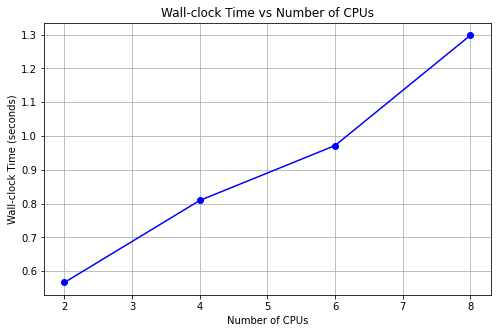

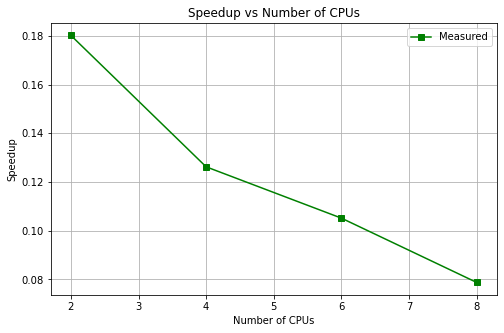

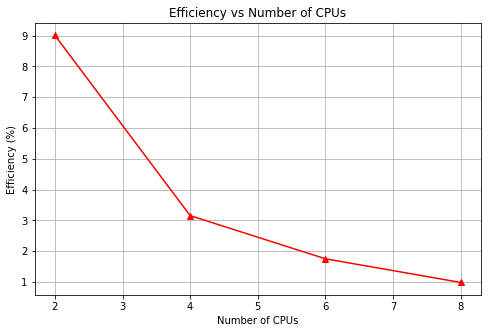

✓ Q2 graphs saved in Assignment_2/Q2/


In [20]:
def plot_and_save_graphs(benchmark_results):
    """Create and save Q2 graphs without ideal line in speedup."""
    import os
    
    # Create folder structure
    main_folder = 'Assignment_2'
    q2_folder = os.path.join(main_folder, 'Q2')
    
    if not os.path.exists(q2_folder):
        os.makedirs(q2_folder)
    
    # Get data from results
    cpus = benchmark_results['cpu_count']
    times = benchmark_results['wall_time']
    speedup_vals = benchmark_results['speedup']
    eff_vals = benchmark_results['efficiency']
    
    # First graph - timing
    plt.figure(figsize=(8,5))
    plt.plot(cpus, times, marker='o', color='blue')
    plt.title("Wall-clock Time vs Number of CPUs")
    plt.xlabel("Number of CPUs")
    plt.ylabel("Wall-clock Time (seconds)")
    plt.grid()
    plt.savefig(f"{q2_folder}/wallclock_time.png")
    plt.show()
    
    # Second graph - speedup (NO IDEAL LINE)
    plt.figure(figsize=(8,5))
    plt.plot(cpus, speedup_vals, marker='s', color='green', label='Measured')
    # REMOVED: plt.plot(cpus, cpus, 'r--', alpha=0.5, label='Perfect')
    plt.title("Speedup vs Number of CPUs")
    plt.xlabel("Number of CPUs")
    plt.ylabel("Speedup")
    plt.legend()
    plt.grid()
    plt.savefig(f"{q2_folder}/speedup.png")
    plt.show()
    
    # Third graph - efficiency 
    plt.figure(figsize=(8,5))
    eff_percentage = [x*100 for x in eff_vals]
    plt.plot(cpus, eff_percentage, marker='^', color='red')
    plt.title("Efficiency vs Number of CPUs")
    plt.xlabel("Number of CPUs")
    plt.ylabel("Efficiency (%)")
    plt.grid()
    plt.savefig(f"{q2_folder}/efficiency.png")
    plt.show()
    
    print(f"✓ Q2 graphs saved in {q2_folder}/")

# Call the function
plot_and_save_graphs(benchmark_results)

*** 
Parallel efficiency decreases due to:
1. **Overhead**: Creating processes, dividing work, combining results
2. **Amdahl's Law**: Some parts can't be parallelized (data loading, combining)
3. **Communication**: Data must be copied between processes
4. **Load Imbalance**: Some CPUs may finish before others

Expected patterns:
- 2 CPUs: ~80-95% efficiency
- 4 CPUs: ~60-80% efficiency  
- 8 CPUs: ~40-60% e*** 
To improve parallel performance:
1. Use larger datasets (more work per CPU)
2. Minimize data copying (use shared memory)
3. Balance workload evenly across CPUs
4. Consider using NumPy operations instead of pandas
5. Use process pools to avoid recreation overhead
"""

### Q3: Use multiprocessing.Pool imap to parallelize the "part2" function

In [21]:
# Pre-compute statistics for normalization
def get_stats(df):
    """Get column means and stds for normalization."""
    return df.mean().values, df.std().values

# Helper function for normalizing a chunk
def normalize_chunk(args):
    """Normalize a chunk using pre-computed stats."""
    chunk_data, means, stds = args
    return (chunk_data - means) / stds

# Q3.1: Parallelize part2 using imap
def parallel_part2_imap(df, num_cpus, chunk_size):
    """
    Parallelize the part2 function using Pool.imap.
    
    Args:
        df: DataFrame to normalize
        num_cpus: Number of CPUs to use
        chunk_size: Chunk size for imap (500 or 2000)
    """
    # Get column statistics
    means, stds = get_stats(df)
    
    # Convert to numpy and create chunks
    data = df.values
    n_rows = len(df)
    
    # Create chunks with stats
    chunks = []
    for i in range(0, n_rows, chunk_size):
        end = min(i + chunk_size, n_rows)
        chunk = data[i:end]
        chunks.append((chunk, means, stds))
    
    # Process with imap
    with Pool(processes=num_cpus) as pool:
        normalized = list(pool.imap(normalize_chunk, chunks, chunksize=1))
    
    # Combine results
    result = np.vstack(normalized)
    return pd.DataFrame(result, columns=df.columns, index=df.index)

# Test implementation
print("Testing imap implementation...")
test1 = parallel_part2_imap(df, 2, 500)
print(f"Chunk 500 - Mean: {test1.mean().mean():.8f}, Std: {test1.std().mean():.8f}")

test2 = parallel_part2_imap(df, 2, 2000)
print(f"Chunk 2000 - Mean: {test2.mean().mean():.8f}, Std: {test2.std().mean():.8f}")

Testing imap implementation...
Chunk 500 - Mean: -0.00000000, Std: 1.00000000
Chunk 2000 - Mean: -0.00000000, Std: 1.00000000


In [22]:
# Q3.2: Benchmark with 2, 4, 6, 8 CPUs
def benchmark_imap(df, cpu_counts, chunk_size):
    """
    Benchmark imap with specific chunk size.
    """
    # Get sequential baseline
    print(f"\nBenchmarking chunk size = {chunk_size}")
    print("-"*50)
    print("Getting sequential baseline...")
    start = time.time()
    _ = part2(df)
    serial_time = time.time() - start
    print(f"Sequential time: {serial_time:.4f} seconds")
    
    # Collect times for all CPU counts
    times = []
    
    for num_cpus in cpu_counts:
        print(f"\nTesting {num_cpus} CPUs...")
        
        # Run 3 times and average
        run_times = []
        for run in range(3):
            start = time.time()
            _ = parallel_part2_imap(df, num_cpus, chunk_size)
            end = time.time()
            run_times.append(end - start)
        
        avg_time = np.mean(run_times)
        times.append(avg_time)
        print(f"  Average time: {avg_time:.4f} seconds")
        print(f"  Speedup calculation: {serial_time:.4f} / {avg_time:.4f} = {serial_time/avg_time:.2f}x")
    
    # Calculate speedup and efficiency explicitly
    speedup = []
    efficiency = []
    
    for parallel_time, num_cpus in zip(times, cpu_counts):
        # Explicit speedup calculation
        speedup_value = serial_time / parallel_time
        speedup.append(speedup_value)
        
        # Explicit efficiency calculation
        efficiency_value = speedup_value / num_cpus
        efficiency.append(efficiency_value)
    
    # Build results dictionary
    results = {
        'cpu_count': cpu_counts,
        'wall_time': times,
        'speedup': speedup,
        'efficiency': efficiency,
        'serial_time': serial_time  # Store serial time in results
    }
    
    return results, serial_time

# Run benchmarks
cpu_counts = [2, 4, 6, 8]
print("\n" + "="*60)
print("Q3.2: BENCHMARKING WITH IMAP")
print("="*60)

# Chunk size 500
results_chunk500, seq_time_500 = benchmark_imap(df, cpu_counts, 500)

# Chunk size 2000
results_chunk2000, seq_time_2000 = benchmark_imap(df, cpu_counts, 2000)

# Display detailed results for both chunk sizes
print("\n" + "="*60)
print("Q3 DETAILED RESULTS")
print("="*60)

for chunk_size, results, seq_t in [(500, results_chunk500, seq_time_500), 
                                     (2000, results_chunk2000, seq_time_2000)]:
    print(f"\nCHUNK SIZE {chunk_size} (creates {20000//chunk_size} chunks):")
    print("-"*60)
    print(f"{'CPUs':<8} {'Parallel(s)':<12} {'Speedup':<20} {'Efficiency':<20}")
    print("-"*60)
    
    for i in range(len(cpu_counts)):
        cpus = results['cpu_count'][i]
        p_time = results['wall_time'][i]
        speedup = results['speedup'][i]
        eff = results['efficiency'][i]
        
        # Show the calculation using the correct seq_t variable
        speedup_calc = f"{seq_t:.4f}/{p_time:.4f}={speedup:.2f}x"
        eff_calc = f"{speedup:.2f}/{cpus}={eff:.2%}"
        
        print(f"{cpus:<8} {p_time:<12.4f} {speedup_calc:<20} {eff_calc:<20}")


Q3.2: BENCHMARKING WITH IMAP

Benchmarking chunk size = 500
--------------------------------------------------
Getting sequential baseline...
Sequential time: 0.0776 seconds

Testing 2 CPUs...
  Average time: 0.2416 seconds
  Speedup calculation: 0.0776 / 0.2416 = 0.32x

Testing 4 CPUs...
  Average time: 0.2504 seconds
  Speedup calculation: 0.0776 / 0.2504 = 0.31x

Testing 6 CPUs...
  Average time: 0.2836 seconds
  Speedup calculation: 0.0776 / 0.2836 = 0.27x

Testing 8 CPUs...
  Average time: 0.2860 seconds
  Speedup calculation: 0.0776 / 0.2860 = 0.27x

Benchmarking chunk size = 2000
--------------------------------------------------
Getting sequential baseline...
Sequential time: 0.0787 seconds

Testing 2 CPUs...
  Average time: 0.2893 seconds
  Speedup calculation: 0.0787 / 0.2893 = 0.27x

Testing 4 CPUs...
  Average time: 0.3010 seconds
  Speedup calculation: 0.0787 / 0.3010 = 0.26x

Testing 6 CPUs...
  Average time: 0.3455 seconds
  Speedup calculation: 0.0787 / 0.3455 = 0.23x


In [23]:
# Print what the chunk sizes mean
print("\nChunk Size Details:")
print(f"  Chunk 500: Creates {20000//500} chunks")
print(f"  Chunk 2000: Creates {20000//2000} chunks")


Chunk Size Details:
  Chunk 500: Creates 40 chunks
  Chunk 2000: Creates 10 chunks


### Q3.3 & Q3.4: Create and save graphs for chunk size 500, 2000

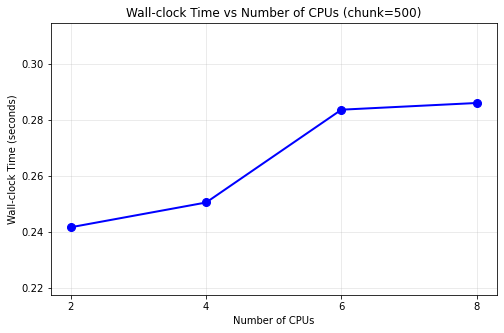

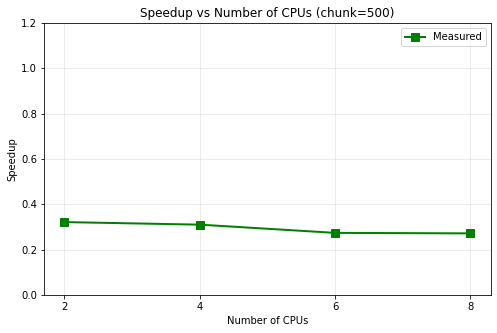

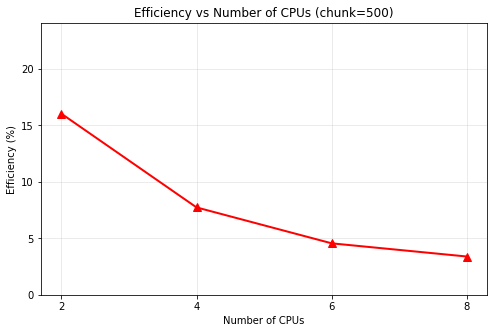

✓ Q3 graphs (chunk=500) saved in Assignment_2/Q3/


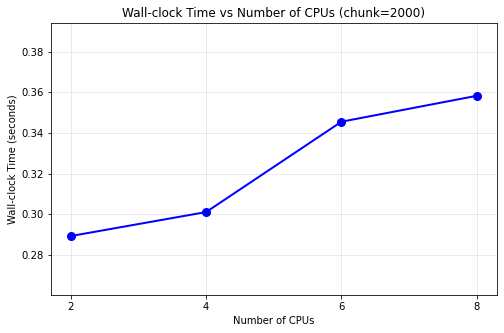

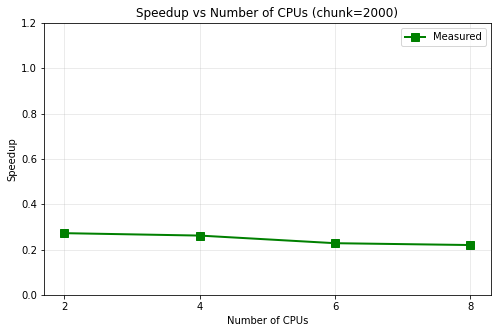

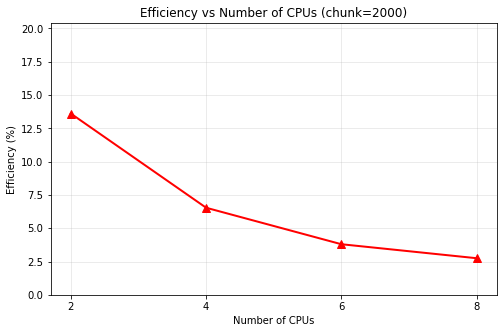

✓ Q3 graphs (chunk=2000) saved in Assignment_2/Q3/


In [24]:
def plot_and_save_graphs_q3(results, chunk_size):
    import os
    import matplotlib.pyplot as plt
    
    # Create nested folder structure
    main_folder = 'Assignment_2'
    q3_folder = os.path.join(main_folder, 'Q3')
    
    # Create folders if they don't exist
    if not os.path.exists(q3_folder):
        os.makedirs(q3_folder)
    
    cpus = results['cpu_count']
    times = results['wall_time']
    speedup_vals = results['speedup']
    eff_vals = results['efficiency']
    
    # Graph 1: Wall-clock time
    plt.figure(figsize=(8,5))
    plt.plot(cpus, times, marker='o', color='blue', linewidth=2, markersize=8)
    plt.title(f"Wall-clock Time vs Number of CPUs (chunk={chunk_size})")
    plt.xlabel("Number of CPUs")
    plt.ylabel("Wall-clock Time (seconds)")
    plt.grid(True, alpha=0.3)
    
    # Set appropriate y-axis limits for wall-clock time
    y_min = min(times) * 0.9  # 10% below minimum
    y_max = max(times) * 1.1  # 10% above maximum
    plt.ylim(y_min, y_max)
    plt.xticks(cpus)  # Show only actual CPU counts
    
    plt.savefig(f"{q3_folder}/wallclock_chunk{chunk_size}.png")
    plt.show()
    
    # Graph 2: Speedup (NO PERFECT LINE)
    plt.figure(figsize=(8,5))
    plt.plot(cpus, speedup_vals, marker='s', color='green', linewidth=2, markersize=8, label='Measured')
    # REMOVED: plt.plot(cpus, cpus, 'r--', alpha=0.5, label='Perfect')
    plt.title(f"Speedup vs Number of CPUs (chunk={chunk_size})")
    plt.xlabel("Number of CPUs")
    plt.ylabel("Speedup")
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Set appropriate y-axis limits for speedup
    if max(speedup_vals) < 1:
        # If all speedup values are less than 1 (poor performance)
        y_min = 0
        y_max = 1.2
    else:
        y_min = 0
        y_max = max(speedup_vals) * 1.2  # 20% above maximum
    plt.ylim(y_min, y_max)
    plt.xticks(cpus)  # Show only actual CPU counts
    
    plt.savefig(f"{q3_folder}/speedup_chunk{chunk_size}.png")
    plt.show()
    
    # Graph 3: Efficiency
    plt.figure(figsize=(8,5))
    eff_percentage = [x*100 for x in eff_vals]
    plt.plot(cpus, eff_percentage, marker='^', color='red', linewidth=2, markersize=8)
    plt.title(f"Efficiency vs Number of CPUs (chunk={chunk_size})")
    plt.xlabel("Number of CPUs")
    plt.ylabel("Efficiency (%)")
    plt.grid(True, alpha=0.3)
    
    # Set appropriate y-axis limits for efficiency
    if max(eff_percentage) < 20:
        # For very low efficiency values
        y_min = 0
        y_max = max(eff_percentage) * 1.5  # Give some space above
    else:
        y_min = 0
        y_max = min(110, max(eff_percentage) * 1.2)  # Cap at 110% or 20% above max
    
    plt.ylim(y_min, y_max)
    plt.xticks(cpus)  # Show only actual CPU counts
    
    plt.savefig(f"{q3_folder}/efficiency_chunk{chunk_size}.png")
    plt.show()
    
    print(f"✓ Q3 graphs (chunk={chunk_size}) saved in {q3_folder}/")

# Generate graphs
plot_and_save_graphs_q3(results_chunk500, 500)
plot_and_save_graphs_q3(results_chunk2000, 2000)

### Q4: Select better chunk size from Q3 (500 or 2000) and compare with Q3

In [25]:
# Q4.1: Determine which chunk size performed better
def select_better_chunk_size(results_chunk500, results_chunk2000):
    """
    Determine which chunk size performed better based on average wall-clock time.
    """
    # Calculate average times
    avg_time_500 = np.mean(results_chunk500['wall_time'])
    avg_time_2000 = np.mean(results_chunk2000['wall_time'])
    
    print("="*60)
    print("Q4: SELECTING BETTER CHUNK SIZE FROM Q3")
    print("="*60)
    
    print(f"\nChunk size 500:")
    print(f"  Average time: {avg_time_500:.4f} seconds")
    print(f"  Total chunks created: {20000//500} chunks")
    
    print(f"\nChunk size 2000:")
    print(f"  Average time: {avg_time_2000:.4f} seconds")  
    print(f"  Total chunks created: {20000//2000} chunks")
    
    if avg_time_500 < avg_time_2000:
        print(f"\n✓ WINNER: Chunk size 500 (faster by {avg_time_2000-avg_time_500:.4f}s)")
        return results_chunk500, 500
    else:
        print(f"\n✓ WINNER: Chunk size 2000 (faster by {avg_time_500-avg_time_2000:.4f}s)")
        return results_chunk2000, 2000

# Select the better chunk size
better_results, better_chunk_size = select_better_chunk_size(results_chunk500, results_chunk2000)

Q4: SELECTING BETTER CHUNK SIZE FROM Q3

Chunk size 500:
  Average time: 0.2654 seconds
  Total chunks created: 40 chunks

Chunk size 2000:
  Average time: 0.3235 seconds
  Total chunks created: 10 chunks

✓ WINNER: Chunk size 500 (faster by 0.0581s)


### Q4.2: Prepare comparison data between Q2 and best Q3

In [26]:
def prepare_comparison_data(q2_results, q3_better_results, chunk_size):
    """
    Combine Q2 and Q3 results for comparison.
    """
    comparison = {
        'cpu_count': q2_results['cpu_count'],
        'q2_map_time': q2_results['wall_time'],
        'q3_imap_time': q3_better_results['wall_time'],
        'q2_map_speedup': q2_results['speedup'],
        'q3_imap_speedup': q3_better_results['speedup'],
        'q2_map_efficiency': q2_results['efficiency'],
        'q3_imap_efficiency': q3_better_results['efficiency'],
        'chunk_size': chunk_size
    }
    return comparison

# Prepare comparison with the better chunk size
comparison_data = prepare_comparison_data(benchmark_results, better_results, better_chunk_size)

# Display comparison table
print("\n" + "="*60)
print(f"Q4: PERFORMANCE COMPARISON - map vs imap (chunk={better_chunk_size})")
print("="*60)

print(f"\n{'CPUs':<8} {'Q2:map(s)':<15} {'Q3:imap(s)':<15} {'Difference':<15} {'Better':<10}")
print("-"*70)

for i in range(len(comparison_data['cpu_count'])):
    cpus = comparison_data['cpu_count'][i]
    q2_time = comparison_data['q2_map_time'][i]
    q3_time = comparison_data['q3_imap_time'][i]
    diff = q3_time - q2_time
    better = "Q2:map" if q2_time < q3_time else "Q3:imap"
    
    print(f"{cpus:<8} {q2_time:<15.4f} {q3_time:<15.4f} {diff:<15.4f} {better:<10}")


Q4: PERFORMANCE COMPARISON - map vs imap (chunk=500)

CPUs     Q2:map(s)       Q3:imap(s)      Difference      Better    
----------------------------------------------------------------------
2        0.5669          0.2416          -0.3253         Q3:imap   
4        0.8094          0.2504          -0.5589         Q3:imap   
6        0.9716          0.2836          -0.6880         Q3:imap   
8        1.2975          0.2860          -1.0115         Q3:imap   


### Q4.3: Create comparison plots (Line graphs)

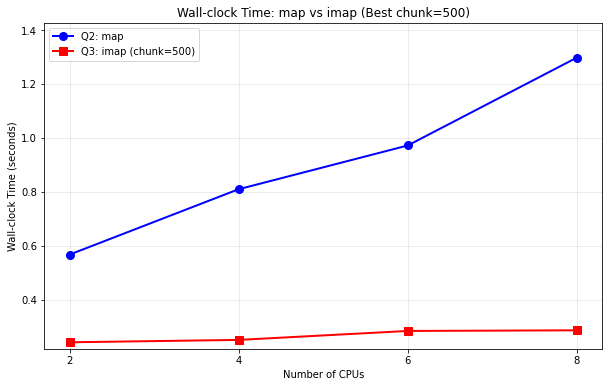

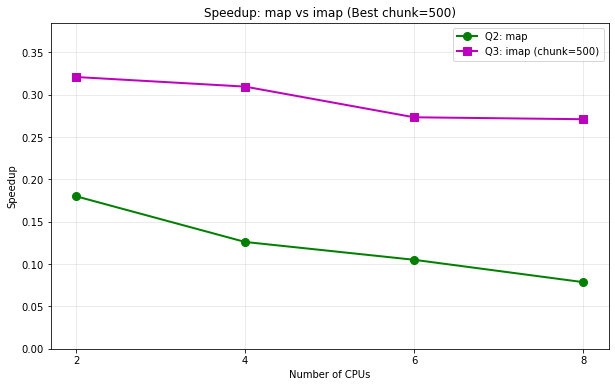

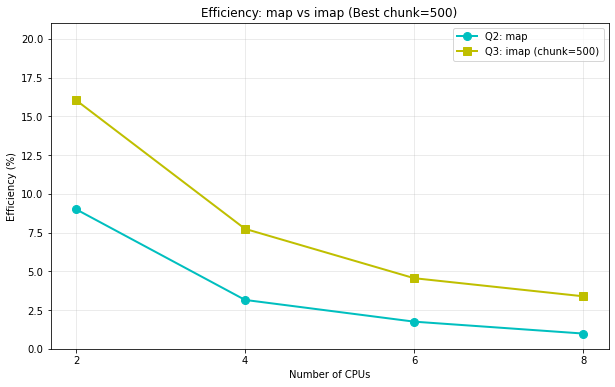


✓ Q4 comparison graphs saved in Assignment_2/Q4/
  Comparing Q2 (map) with Q3 (imap, chunk=500)


In [27]:
def plot_and_save_comparison_q4(comparison_data):
    """
    Create comparison plots between Q2 and best Q3 chunk size.
    """
    # Create folder structure
    main_folder = 'Assignment_2'
    q4_folder = os.path.join(main_folder, 'Q4')
    
    if not os.path.exists(q4_folder):
        os.makedirs(q4_folder)
    
    cpus = comparison_data['cpu_count']
    chunk_size = comparison_data['chunk_size']
    
    # Graph 1: Wall-clock Time Comparison
    plt.figure(figsize=(10, 6))
    plt.plot(cpus, comparison_data['q2_map_time'], 'b-o', 
             label='Q2: map', linewidth=2, markersize=8)
    plt.plot(cpus, comparison_data['q3_imap_time'], 'r-s', 
             label=f'Q3: imap (chunk={chunk_size})', linewidth=2, markersize=8)
    plt.title(f"Wall-clock Time: map vs imap (Best chunk={chunk_size})")
    plt.xlabel("Number of CPUs")
    plt.ylabel("Wall-clock Time (seconds)")
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Set appropriate y-axis limits based on actual data
    all_times = comparison_data['q2_map_time'] + comparison_data['q3_imap_time']
    y_min = min(all_times) * 0.9  # 10% below minimum
    y_max = max(all_times) * 1.1  # 10% above maximum
    plt.ylim(y_min, y_max)
    
    # Set x-axis to show only actual CPU counts
    plt.xticks(cpus)
    
    plt.savefig(f"{q4_folder}/wallclock_comparison.png")
    plt.show()
    
    # Graph 2: Speedup Comparison  
    plt.figure(figsize=(10, 6))
    plt.plot(cpus, comparison_data['q2_map_speedup'], 'g-o', 
             label='Q2: map', linewidth=2, markersize=8)
    plt.plot(cpus, comparison_data['q3_imap_speedup'], 'm-s', 
             label=f'Q3: imap (chunk={chunk_size})', linewidth=2, markersize=8)
    # No ideal line as requested
    plt.title(f"Speedup: map vs imap (Best chunk={chunk_size})")
    plt.xlabel("Number of CPUs")
    plt.ylabel("Speedup")
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Set appropriate y-axis limits for speedup
    all_speedups = comparison_data['q2_map_speedup'] + comparison_data['q3_imap_speedup']
    y_min = 0  # Speedup starts at 0
    y_max = max(all_speedups) * 1.2  # 20% above maximum
    plt.ylim(y_min, y_max)
    
    # Set x-axis to show only actual CPU counts
    plt.xticks(cpus)
    
    plt.savefig(f"{q4_folder}/speedup_comparison.png")
    plt.show()
    
    # Graph 3: Efficiency Comparison
    plt.figure(figsize=(10, 6))
    q2_eff = [e*100 for e in comparison_data['q2_map_efficiency']]
    q3_eff = [e*100 for e in comparison_data['q3_imap_efficiency']]
    
    plt.plot(cpus, q2_eff, 'c-o', 
             label='Q2: map', linewidth=2, markersize=8)
    plt.plot(cpus, q3_eff, 'y-s', 
             label=f'Q3: imap (chunk={chunk_size})', linewidth=2, markersize=8)
    # No ideal line as requested
    plt.title(f"Efficiency: map vs imap (Best chunk={chunk_size})")
    plt.xlabel("Number of CPUs")
    plt.ylabel("Efficiency (%)")
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Set appropriate y-axis limits for efficiency
    all_efficiencies = q2_eff + q3_eff
    y_min = 0  # Efficiency starts at 0
    y_max = min(max(all_efficiencies) * 1.2, 100)  # 20% above max or 100%, whichever is lower
    
    # If efficiency is very low (< 20%), adjust scale
    if y_max < 20:
        y_max = max(all_efficiencies) + 5  # Add 5% padding for very low values
    
    plt.ylim(y_min, y_max)
    
    # Set x-axis to show only actual CPU counts
    plt.xticks(cpus)
    
    plt.savefig(f"{q4_folder}/efficiency_comparison.png")
    plt.show()
    
    print(f"\n✓ Q4 comparison graphs saved in {q4_folder}/")
    print(f"  Comparing Q2 (map) with Q3 (imap, chunk={chunk_size})")

# Create the comparison plots
plot_and_save_comparison_q4(comparison_data)

### Part 3: Q1 - Define function "part3" to do the same as Part1-Q3

In [28]:
def part3(df):
    """
    Compute correlation between consecutive rows (same as Part1-Q3).
    
    Args:
        df: DataFrame to process
    
    Returns:
        Series containing correlations between each row and its succeeding row
    """
    correlations = []
    
    # Compute correlation between each row and the next row
    for i in range(len(df) - 1):
        # Calculate correlation between row i and row i+1
        corr = df.iloc[i].corr(df.iloc[i + 1])
        correlations.append(corr)
    
    return pd.Series(correlations)

# Test the function
print("Testing part3 function...")
start_time = time.time()
row_correlations = part3(df_normalized)  # Use normalized df from Part 1
end_time = time.time()

print(f"Serial Execution time: {end_time - start_time:.4f} seconds")
print(f"Number of correlations computed: {len(row_correlations)}")
print(f"First 5 correlations: {row_correlations.head()}")
print(f"Mean correlation: {row_correlations.mean():.6f}")
print(f"Std of correlations: {row_correlations.std():.6f}")

Testing part3 function...
Serial Execution time: 9.3036 seconds
Number of correlations computed: 19999
First 5 correlations: 0   -0.068345
1   -0.004486
2    0.069020
3   -0.103120
4    0.027491
dtype: float64
Mean correlation: -0.000133
Std of correlations: 0.071422


## -- Perfect

### Part 3 Q2.1: Define parallel version of part3 using Pool.map

In [29]:
def compute_correlations_chunk(args):
    """Helper function to compute correlations for a chunk of row indices."""
    indices, df_values = args
    correlations = []
    
    for i in indices:
        row1 = df_values[i]
        row2 = df_values[i + 1]
        
        # Compute correlation between row i and row i+1
        mean1 = np.mean(row1)
        mean2 = np.mean(row2)
        std1 = np.std(row1, ddof=1)
        std2 = np.std(row2, ddof=1)
        
        # Pearson correlation formula
        corr = np.mean((row1 - mean1) * (row2 - mean2)) / (std1 * std2)
        correlations.append(corr)
    
    return correlations

def parallel_part3(df, num_cpus):
    """
    Parallelize part3 function using multiprocessing.Pool.map.
    
    Args:
        df: DataFrame to process
        num_cpus: Number of CPUs to use
    
    Returns:
        Series of correlations between consecutive rows
    """
    df_values = df.values
    n_rows = len(df)
    
    # Create indices for row pairs (0 to n_rows-2)
    all_indices = list(range(n_rows - 1))
    
    # Split indices into chunks for each CPU
    index_chunks = np.array_split(all_indices, num_cpus)
    
    # Prepare arguments for pool.map
    chunks = [(chunk.tolist(), df_values) for chunk in index_chunks]
    
    # Use Pool.map to process chunks in parallel
    with Pool(processes=num_cpus) as pool:
        results = pool.map(compute_correlations_chunk, chunks)
    
    # Flatten results into single list
    all_correlations = []
    for chunk_result in results:
        all_correlations.extend(chunk_result)
    
    return pd.Series(all_correlations)

# Test the implementation
print("Testing parallel_part3 implementation...")
print("-"*50)
test_start = time.time()
test_result = parallel_part3(df_normalized, 2)
test_time = time.time() - test_start
print(f"Test execution time (2 CPUs): {test_time:.4f} seconds")
print(f"Number of correlations computed: {len(test_result)}")
print(f"First 5 correlations: {list(test_result.head())}")
print(f"Mean correlation: {test_result.mean():.6f}")
print()

Testing parallel_part3 implementation...
--------------------------------------------------
Test execution time (2 CPUs): 1.5910 seconds
Number of correlations computed: 19999
First 5 correlations: [-0.06800340828380334, -0.004463870532269514, 0.06867500333364385, -0.10260460765591112, 0.027354006305039882]
Mean correlation: -0.000133



### Part 3 Q2.2: Benchmark with different CPU counts

In [30]:
# Part 3 Q2.2: Time the parallel code with different CPUs

# Get sequential baseline first
print("\n" + "="*50)
print("Sequential Baseline:")
start = time.time()
seq_result = part3(df_normalized)
sequential_time = time.time() - start
print(f"Sequential time: {sequential_time:.4f} seconds")

# Test with different CPU counts
cpu_counts = [2, 4, 6, 8]
results = {
    'cpu_count': [],
    'wall_time': [],
    'speedup': [],
    'efficiency': []
}

print("\nParallel Testing:")
print("-"*50)

for num_cpus in cpu_counts:
    print(f"\n{num_cpus} CPUs:")
    
    # Run 3 times
    times = []
    for i in range(3):
        start = time.time()
        _ = parallel_part3(df_normalized, num_cpus)
        elapsed = time.time() - start
        times.append(elapsed)
        print(f"  Run {i+1}: {elapsed:.4f}s")
    
    # Calculate average
    avg_time = np.mean(times)
    speedup = sequential_time / avg_time
    efficiency = speedup / num_cpus
    
    # Store results
    results['cpu_count'].append(num_cpus)
    results['wall_time'].append(avg_time)
    results['speedup'].append(speedup)
    results['efficiency'].append(efficiency)
    
    print(f"  Average: {avg_time:.4f}s")
    print(f"  Speedup: {speedup:.2f}x")
    print(f"  Efficiency: {efficiency:.2%}")

# Save for later use
part3_q2_results = results
part3_seq_time = sequential_time


Sequential Baseline:
Sequential time: 9.3415 seconds

Parallel Testing:
--------------------------------------------------

2 CPUs:
  Run 1: 1.4549s
  Run 2: 1.4995s
  Run 3: 1.4212s
  Average: 1.4585s
  Speedup: 6.40x
  Efficiency: 320.24%

4 CPUs:
  Run 1: 1.1585s
  Run 2: 1.1337s
  Run 3: 1.1385s
  Average: 1.1436s
  Speedup: 8.17x
  Efficiency: 204.22%

6 CPUs:
  Run 1: 1.1162s
  Run 2: 1.1245s
  Run 3: 1.1198s
  Average: 1.1201s
  Speedup: 8.34x
  Efficiency: 138.99%

8 CPUs:
  Run 1: 1.2030s
  Run 2: 1.2653s
  Run 3: 1.2223s
  Average: 1.2302s
  Speedup: 7.59x
  Efficiency: 94.92%


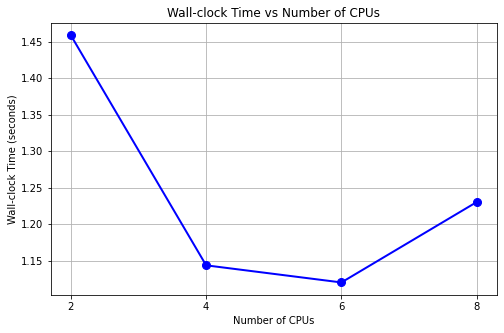

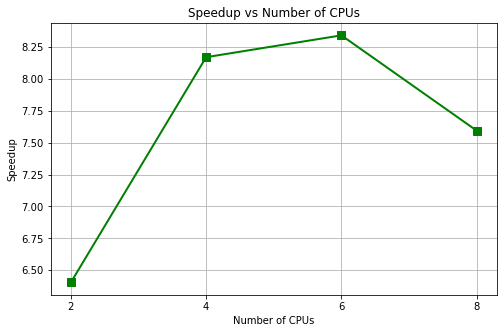

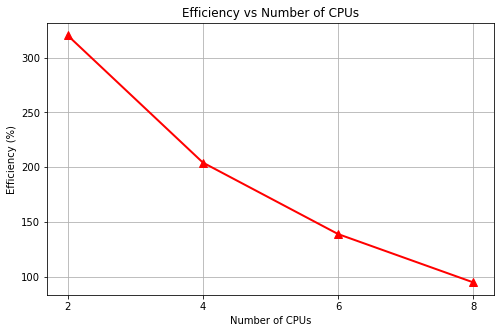


Graphs saved in Assignment_2/Part3_Q2/

Part 3 Q2 Summary:
--------------------------------------------------
Sequential time: 9.3415s

Parallel times:
  2 CPUs: 1.4585s (speedup: 6.40x)
  4 CPUs: 1.1436s (speedup: 8.17x)
  6 CPUs: 1.1201s (speedup: 8.34x)
  8 CPUs: 1.2302s (speedup: 7.59x)


In [31]:
# Part 3 Q2.3 & Q2.4: Plot and save graphs

# Create folder
folder = 'Assignment_2/Part3_Q2'
if not os.path.exists(folder):
    os.makedirs(folder)

cpus = results['cpu_count']
times = results['wall_time']
speedups = results['speedup']
efficiencies = [e * 100 for e in results['efficiency']]

# Graph 1: Wall-clock time
plt.figure(figsize=(8, 5))
plt.plot(cpus, times, 'bo-', linewidth=2, markersize=8)
plt.title('Wall-clock Time vs Number of CPUs')
plt.xlabel('Number of CPUs')
plt.ylabel('Wall-clock Time (seconds)')
plt.grid(True)
plt.xticks(cpus)
plt.savefig(f'{folder}/wallclock_time.png')
plt.show()

# Graph 2: Speedup
plt.figure(figsize=(8, 5))
plt.plot(cpus, speedups, 'gs-', linewidth=2, markersize=8)
plt.title('Speedup vs Number of CPUs')
plt.xlabel('Number of CPUs')
plt.ylabel('Speedup')
plt.grid(True)
plt.xticks(cpus)
plt.savefig(f'{folder}/speedup.png')
plt.show()

# Graph 3: Efficiency
plt.figure(figsize=(8, 5))
plt.plot(cpus, efficiencies, 'r^-', linewidth=2, markersize=8)
plt.title('Efficiency vs Number of CPUs')
plt.xlabel('Number of CPUs')
plt.ylabel('Efficiency (%)')
plt.grid(True)
plt.xticks(cpus)
plt.savefig(f'{folder}/efficiency.png')
plt.show()

print(f"\nGraphs saved in {folder}/")

# Final summary
print("\n" + "="*50)
print("Part 3 Q2 Summary:")
print("-"*50)
print(f"Sequential time: {sequential_time:.4f}s")
print("\nParallel times:")
for i, cpu in enumerate(cpus):
    print(f"  {cpu} CPUs: {times[i]:.4f}s (speedup: {speedups[i]:.2f}x)")

### Part 3 Q3: Use imap with different chunk sizes

In [32]:
# Part 3 Q3: Use imap with different chunk sizes

def compute_single_correlation(args):
    """Compute correlation for a single row pair."""
    i, data = args
    row1 = data[i]
    row2 = data[i + 1]
    corr = np.corrcoef(row1, row2)[0, 1]
    return corr

def parallel_part3_imap(df, num_cpus, chunk_size):
    """
    Parallelize part3 using Pool.imap with specified chunk size.
    """
    data = df.values
    n_rows = len(df)
    
    # Create arguments for each row pair
    args = [(i, data) for i in range(n_rows - 1)]
    
    # Use imap with chunk size
    with Pool(processes=num_cpus) as pool:
        results = list(pool.imap(compute_single_correlation, args, chunksize=chunk_size))
    
    return pd.Series(results)

# Test with two chunk sizes WITH TIMING
print("Testing imap implementation with timing...")
print("-"*50)

# Test chunk size 250
start = time.time()
test1 = parallel_part3_imap(df_normalized, 2, chunk_size=250)
time_250 = time.time() - start
print(f"Chunk size 250: Computed {len(test1)} correlations")
print(f"  Time taken: {time_250:.4f} seconds")

# Test chunk size 1000
start = time.time()
test2 = parallel_part3_imap(df_normalized, 2, chunk_size=1000)
time_1000 = time.time() - start
print(f"Chunk size 1000: Computed {len(test2)} correlations")
print(f"  Time taken: {time_1000:.4f} seconds")

print(f"\nTime difference: {abs(time_250 - time_1000):.4f} seconds")
if time_250 < time_1000:
    print(f"Chunk size 250 is faster")
else:
    print(f"Chunk size 1000 is faster")

Testing imap implementation with timing...
--------------------------------------------------
Chunk size 250: Computed 19999 correlations
  Time taken: 8.7838 seconds
Chunk size 1000: Computed 19999 correlations
  Time taken: 2.5227 seconds

Time difference: 6.2611 seconds
Chunk size 1000 is faster


In [33]:
# Part 3 Q3.2: Benchmark imap with 2 chunk sizes

def benchmark_part3_imap(df, cpu_counts, chunk_size):
    """Benchmark imap with specific chunk size."""
    
    print(f"\n{'='*50}")
    print(f"Testing chunk size = {chunk_size}")
    print('='*50)
    
    results = {
        'cpu_count': [],
        'wall_time': [],
        'speedup': [],
        'efficiency': []
    }
    
    for num_cpus in cpu_counts:
        print(f"\n{num_cpus} CPUs:")
        
        # Run 3 times
        times = []
        for i in range(3):
            start = time.time()
            _ = parallel_part3_imap(df, num_cpus, chunk_size)
            elapsed = time.time() - start
            times.append(elapsed)
            print(f"  Run {i+1}: {elapsed:.4f}s")
        
        # Calculate metrics
        avg_time = np.mean(times)
        speedup = part3_seq_time / avg_time  # Using sequential time from Q2
        efficiency = speedup / num_cpus
        
        results['cpu_count'].append(num_cpus)
        results['wall_time'].append(avg_time)
        results['speedup'].append(speedup)
        results['efficiency'].append(efficiency)
        
        print(f"  Average: {avg_time:.4f}s")
        print(f"  Speedup: {speedup:.2f}x")
        print(f"  Efficiency: {efficiency:.2%}")
    
    return results

# Benchmark with 2 chunk sizes
cpu_counts = [2, 4, 6, 8]

# Chunk size 250 (for 19,999 correlations)
results_chunk250 = benchmark_part3_imap(df_normalized, cpu_counts, 250)

# Chunk size 1000
results_chunk1000 = benchmark_part3_imap(df_normalized, cpu_counts, 1000)

# Save for Q4
part3_chunk250_results = results_chunk250
part3_chunk1000_results = results_chunk1000


Testing chunk size = 250

2 CPUs:
  Run 1: 8.7900s
  Run 2: 8.7290s
  Run 3: 8.6481s
  Average: 8.7224s
  Speedup: 1.07x
  Efficiency: 53.55%

4 CPUs:
  Run 1: 8.6024s
  Run 2: 9.0271s
  Run 3: 8.8395s
  Average: 8.8230s
  Speedup: 1.06x
  Efficiency: 26.47%

6 CPUs:
  Run 1: 8.7051s
  Run 2: 8.8199s
  Run 3: 8.7867s
  Average: 8.7706s
  Speedup: 1.07x
  Efficiency: 17.75%

8 CPUs:
  Run 1: 8.6100s
  Run 2: 8.6369s
  Run 3: 8.8710s
  Average: 8.7059s
  Speedup: 1.07x
  Efficiency: 13.41%

Testing chunk size = 1000

2 CPUs:
  Run 1: 2.5574s
  Run 2: 2.4062s
  Run 3: 2.4537s
  Average: 2.4724s
  Speedup: 3.78x
  Efficiency: 188.91%

4 CPUs:
  Run 1: 2.4984s
  Run 2: 2.4833s
  Run 3: 2.5610s
  Average: 2.5142s
  Speedup: 3.72x
  Efficiency: 92.89%

6 CPUs:
  Run 1: 2.6277s
  Run 2: 2.6328s
  Run 3: 2.5489s
  Average: 2.6032s
  Speedup: 3.59x
  Efficiency: 59.81%

8 CPUs:
  Run 1: 2.4566s
  Run 2: 2.6701s
  Run 3: 2.5254s
  Average: 2.5507s
  Speedup: 3.66x
  Efficiency: 45.78%



Generating graphs for chunk size 250...


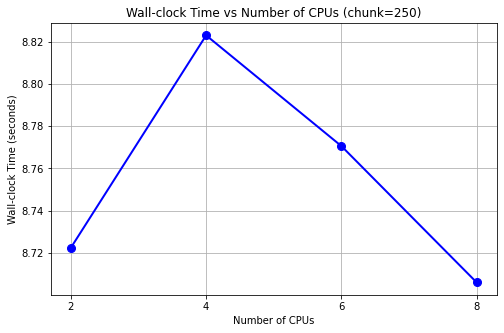

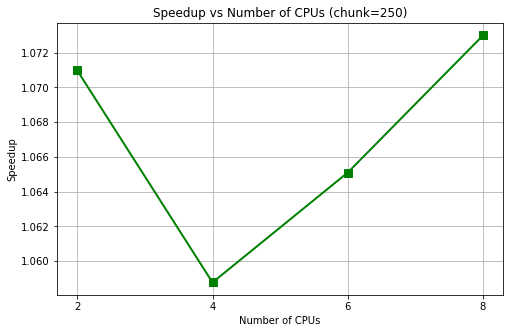

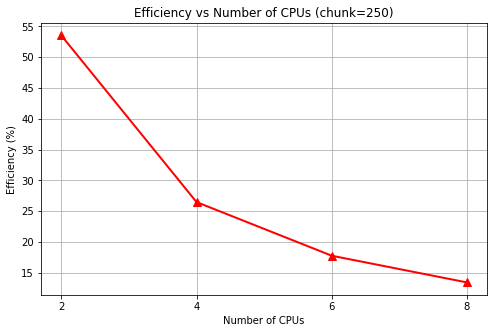

Graphs for chunk size 250 saved!

Generating graphs for chunk size 1000...


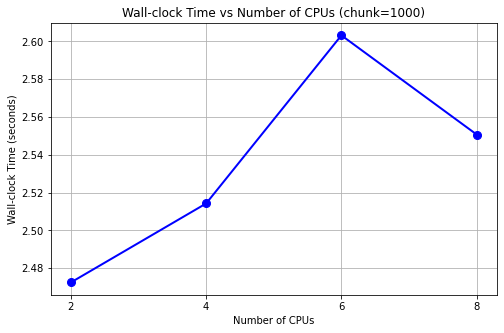

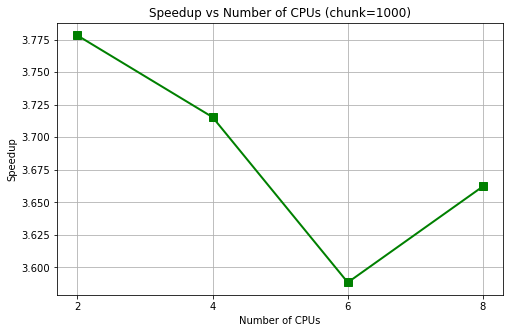

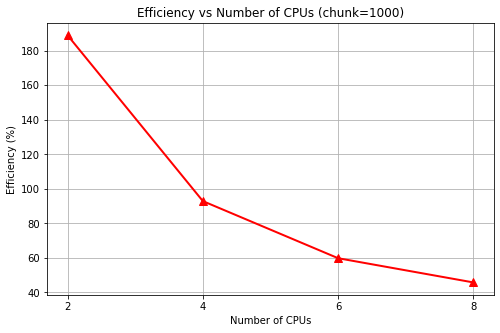

Graphs for chunk size 1000 saved!

Part 3 Q3 Summary:
--------------------------------------------------

Chunk size 250:
  2 CPUs: 8.7224s
  4 CPUs: 8.8230s
  6 CPUs: 8.7706s
  8 CPUs: 8.7059s

Chunk size 1000:
  2 CPUs: 2.4724s
  4 CPUs: 2.5142s
  6 CPUs: 2.6032s
  8 CPUs: 2.5507s

Total graphs saved: 6
Location: Assignment_2/Part3_Q3/


In [34]:
# Part 3 Q3.3 & Q3.4: Plot and save graphs for both chunk sizes

def plot_part3_imap(results, chunk_size):
    """Create and save graphs for specific chunk size."""
    
    folder = f'Assignment_2/Part3_Q3'
    if not os.path.exists(folder):
        os.makedirs(folder)
    
    cpus = results['cpu_count']
    times = results['wall_time']
    speedups = results['speedup']
    efficiencies = [e * 100 for e in results['efficiency']]
    
    # Graph 1: Wall-clock time
    plt.figure(figsize=(8, 5))
    plt.plot(cpus, times, 'bo-', linewidth=2, markersize=8)
    plt.title(f'Wall-clock Time vs Number of CPUs (chunk={chunk_size})')
    plt.xlabel('Number of CPUs')
    plt.ylabel('Wall-clock Time (seconds)')
    plt.grid(True)
    plt.xticks(cpus)
    plt.savefig(f'{folder}/wallclock_chunk{chunk_size}.png')
    plt.show()
    
    # Graph 2: Speedup
    plt.figure(figsize=(8, 5))
    plt.plot(cpus, speedups, 'gs-', linewidth=2, markersize=8)
    plt.title(f'Speedup vs Number of CPUs (chunk={chunk_size})')
    plt.xlabel('Number of CPUs')
    plt.ylabel('Speedup')
    plt.grid(True)
    plt.xticks(cpus)
    plt.savefig(f'{folder}/speedup_chunk{chunk_size}.png')
    plt.show()
    
    # Graph 3: Efficiency
    plt.figure(figsize=(8, 5))
    plt.plot(cpus, efficiencies, 'r^-', linewidth=2, markersize=8)
    plt.title(f'Efficiency vs Number of CPUs (chunk={chunk_size})')
    plt.xlabel('Number of CPUs')
    plt.ylabel('Efficiency (%)')
    plt.grid(True)
    plt.xticks(cpus)
    plt.savefig(f'{folder}/efficiency_chunk{chunk_size}.png')
    plt.show()
    
    print(f"Graphs for chunk size {chunk_size} saved!")

# Create graphs for both chunk sizes
print("\nGenerating graphs for chunk size 250...")
plot_part3_imap(results_chunk250, 250)

print("\nGenerating graphs for chunk size 1000...")
plot_part3_imap(results_chunk1000, 1000)

# Summary
print("\n" + "="*50)
print("Part 3 Q3 Summary:")
print("-"*50)

print("\nChunk size 250:")
for i, cpu in enumerate(cpu_counts):
    print(f"  {cpu} CPUs: {results_chunk250['wall_time'][i]:.4f}s")

print("\nChunk size 1000:")
for i, cpu in enumerate(cpu_counts):
    print(f"  {cpu} CPUs: {results_chunk1000['wall_time'][i]:.4f}s")

print(f"\nTotal graphs saved: 6")
print("Location: Assignment_2/Part3_Q3/")

### Part 3 Q4: Compare Performance

In [35]:
# Part 3 Q4: Select better chunk size from Q3

print("\n" + "="*60)
print("PART 3 Q4: SELECTING BETTER CHUNK SIZE")
print("="*60)

# Calculate average times for each chunk size
avg_time_250 = np.mean(results_chunk250['wall_time'])
avg_time_1000 = np.mean(results_chunk1000['wall_time'])

print(f"\nChunk size 250:")
print(f"  Average time across all CPUs: {avg_time_250:.4f} seconds")

print(f"\nChunk size 1000:")
print(f"  Average time across all CPUs: {avg_time_1000:.4f} seconds")

# Select better chunk size
if avg_time_250 < avg_time_1000:
    better_results = results_chunk250
    better_chunk = 250
    print(f"\n✓ Better chunk size: 250 (faster by {avg_time_1000 - avg_time_250:.4f}s)")
else:
    better_results = results_chunk1000
    better_chunk = 1000
    print(f"\n✓ Better chunk size: 1000 (faster by {avg_time_250 - avg_time_1000:.4f}s)")


PART 3 Q4: SELECTING BETTER CHUNK SIZE

Chunk size 250:
  Average time across all CPUs: 8.7555 seconds

Chunk size 1000:
  Average time across all CPUs: 2.5351 seconds

✓ Better chunk size: 1000 (faster by 6.2203s)


In [36]:
# Compare Q2 (Pool.map) with best Q3 (imap with better chunk)

print("\n" + "="*60)
print("COMPARISON: Q2 (map) vs Q3 (best imap)")
print("="*60)

print(f"\n{'CPUs':<8} {'Q2 map (s)':<15} {'Q3 imap-{}'.format(better_chunk):<20} {'Difference (s)':<15}")
print("-"*60)

for i in range(len(cpu_counts)):
    cpu = cpu_counts[i]
    q2_time = part3_q2_results['wall_time'][i]
    q3_time = better_results['wall_time'][i]
    diff = q3_time - q2_time
    
    print(f"{cpu:<8} {q2_time:<15.4f} {q3_time:<20.4f} {diff:<15.4f}")

# Determine overall winner
avg_q2 = np.mean(part3_q2_results['wall_time'])
avg_q3 = np.mean(better_results['wall_time'])

print(f"\nAverage times:")
print(f"  Q2 (map): {avg_q2:.4f} seconds")
print(f"  Q3 (imap-{better_chunk}): {avg_q3:.4f} seconds")

if avg_q2 < avg_q3:
    print(f"✓ Overall winner: Q2 Pool.map")
else:
    print(f"✓ Overall winner: Q3 imap with chunk={better_chunk}")


COMPARISON: Q2 (map) vs Q3 (best imap)

CPUs     Q2 map (s)      Q3 imap-1000         Difference (s) 
------------------------------------------------------------
2        1.4585          2.4724               1.0139         
4        1.1436          2.5142               1.3706         
6        1.1201          2.6032               1.4830         
8        1.2302          2.5507               1.3205         

Average times:
  Q2 (map): 1.2381 seconds
  Q3 (imap-1000): 2.5351 seconds
✓ Overall winner: Q2 Pool.map


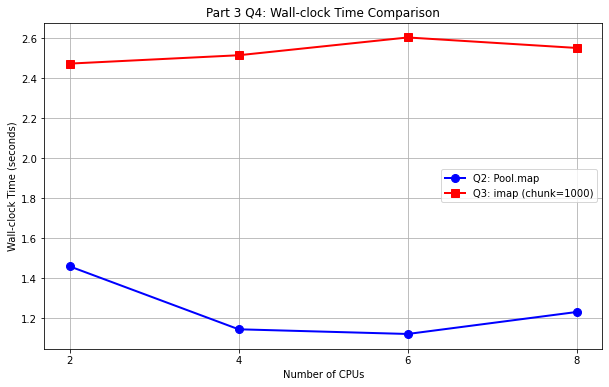

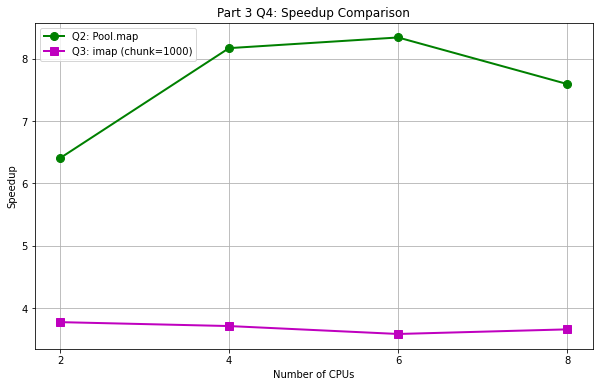

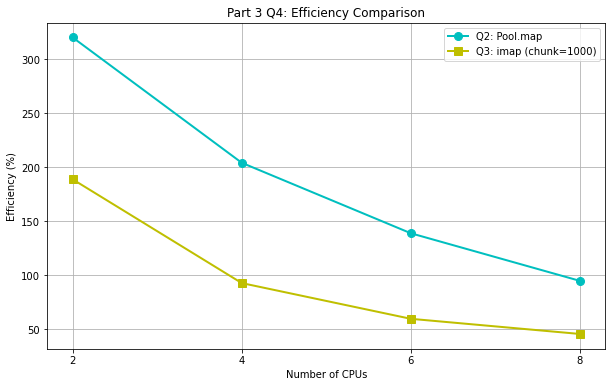


✓ Comparison graphs saved in Assignment_2/Part3_Q4/


In [37]:
# Part 3 Q4: Create comparison plots

import matplotlib.pyplot as plt
import os

# Create folder
folder = 'Assignment_2/Part3_Q4'
if not os.path.exists(folder):
    os.makedirs(folder)

cpus = cpu_counts

# Graph 1: Wall-clock Time Comparison
plt.figure(figsize=(10, 6))
plt.plot(cpus, part3_q2_results['wall_time'], 'bo-', 
         label='Q2: Pool.map', linewidth=2, markersize=8)
plt.plot(cpus, better_results['wall_time'], 'rs-', 
         label=f'Q3: imap (chunk={better_chunk})', linewidth=2, markersize=8)
plt.title('Part 3 Q4: Wall-clock Time Comparison')
plt.xlabel('Number of CPUs')
plt.ylabel('Wall-clock Time (seconds)')
plt.legend()
plt.grid(True)
plt.xticks(cpus)
plt.savefig(f'{folder}/wallclock_comparison.png')
plt.show()

# Graph 2: Speedup Comparison
plt.figure(figsize=(10, 6))
plt.plot(cpus, part3_q2_results['speedup'], 'go-', 
         label='Q2: Pool.map', linewidth=2, markersize=8)
plt.plot(cpus, better_results['speedup'], 'ms-', 
         label=f'Q3: imap (chunk={better_chunk})', linewidth=2, markersize=8)
plt.title('Part 3 Q4: Speedup Comparison')
plt.xlabel('Number of CPUs')
plt.ylabel('Speedup')
plt.legend()
plt.grid(True)
plt.xticks(cpus)
plt.savefig(f'{folder}/speedup_comparison.png')
plt.show()

# Graph 3: Efficiency Comparison
plt.figure(figsize=(10, 6))
q2_eff = [e * 100 for e in part3_q2_results['efficiency']]
q3_eff = [e * 100 for e in better_results['efficiency']]

plt.plot(cpus, q2_eff, 'co-', 
         label='Q2: Pool.map', linewidth=2, markersize=8)
plt.plot(cpus, q3_eff, 'ys-', 
         label=f'Q3: imap (chunk={better_chunk})', linewidth=2, markersize=8)
plt.title('Part 3 Q4: Efficiency Comparison')
plt.xlabel('Number of CPUs')
plt.ylabel('Efficiency (%)')
plt.legend()
plt.grid(True)
plt.xticks(cpus)
plt.savefig(f'{folder}/efficiency_comparison.png')
plt.show()

print(f"\n✓ Comparison graphs saved in {folder}/")

In [38]:
# Final summary for Part 3 Q4

print("\n" + "="*60)
print("PART 3 Q4 COMPLETE SUMMARY")
print("="*60)

print(f"\nBetter chunk size selected: {better_chunk}")
print(f"Sequential baseline: {part3_seq_time:.4f} seconds")

print("\nPerformance comparison (wall-clock time):")
print(f"{'Method':<25} {'2 CPUs':<12} {'4 CPUs':<12} {'6 CPUs':<12} {'8 CPUs':<12}")
print("-"*70)
print(f"{'Q2: Pool.map':<25}", end="")
for t in part3_q2_results['wall_time']:
    print(f" {t:<12.4f}", end="")
print()

print(f"{'Q3: imap (chunk='+str(better_chunk)+')':<25}", end="")
for t in better_results['wall_time']:
    print(f" {t:<12.4f}", end="")
print()

print(f"\nGraphs saved:")
print(f"  1. wallclock_comparison.png")
print(f"  2. speedup_comparison.png")
print(f"  3. efficiency_comparison.png")
print(f"  Location: {folder}/")


PART 3 Q4 COMPLETE SUMMARY

Better chunk size selected: 1000
Sequential baseline: 9.3415 seconds

Performance comparison (wall-clock time):
Method                    2 CPUs       4 CPUs       6 CPUs       8 CPUs      
----------------------------------------------------------------------
Q2: Pool.map              1.4585       1.1436       1.1201       1.2302      
Q3: imap (chunk=1000)     2.4724       2.5142       2.6032       2.5507      

Graphs saved:
  1. wallclock_comparison.png
  2. speedup_comparison.png
  3. efficiency_comparison.png
  Location: Assignment_2/Part3_Q4/
